In [269]:
import pickle

ind = pickle.load( open( "Extrasensory_individual_data.p", "rb" ) )
ssr = pickle.load( open( "Extrasensory_sensor_data.p", "rb" ) )


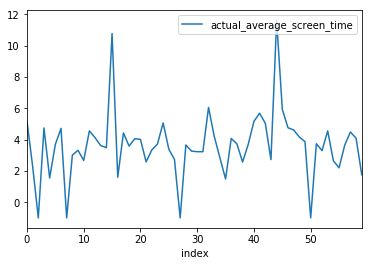

In [221]:
from pandas import DataFrame
import matplotlib.pyplot as plt

df = DataFrame(ind,columns=['actual_average_screen_time'])
df.reset_index().plot(x = 'index' ,y = 'actual_average_screen_time', kind = 'line')
plt.show()

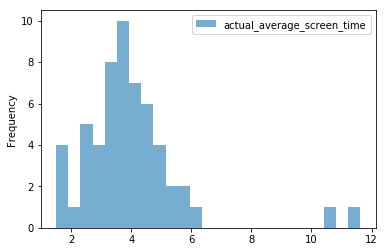

In [219]:
import pandas as pd

ind_wo_missing = ind[ind.actual_average_screen_time != -1]
df_wo_missing = pd.DataFrame(ind_wo_missing,columns=['actual_average_screen_time'])
hist = df_wo_missing.plot.hist(bins = 25, alpha = 0.6)
plt.show()


In [133]:
print(df_wo_missing.skew())

actual_average_screen_time    2.463926
dtype: float64


In [276]:
mean = ind_wo_missing['actual_average_screen_time'].mean()
median = ind_wo_missing['actual_average_screen_time'].median()

df_mean = DataFrame(ind,columns=['actual_average_screen_time'])
df_mean.loc[(df_mean.actual_average_screen_time == -1), 'actual_average_screen_time'] = mean 

df_median = DataFrame(ind,columns=['actual_average_screen_time'])
df_median.loc[(df_median.actual_average_screen_time == -1), 'actual_average_screen_time'] = median

df_rand = DataFrame(ind,columns=['actual_average_screen_time'])
df_rand['actual_average_screen_time'][2] = random.uniform(1.49,6.06)
df_rand['actual_average_screen_time'][7] = random.uniform(1.49,6.06)
df_rand['actual_average_screen_time'][27] = random.uniform(1.49,6.06)
df_rand['actual_average_screen_time'][50] = random.uniform(1.49,6.06)

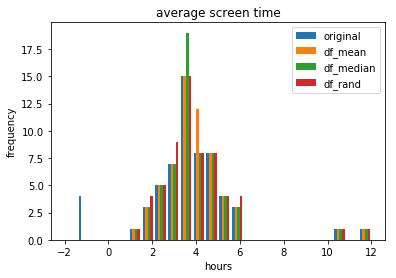

In [280]:
original = ind['actual_average_screen_time']

bins = np.linspace(-2, 12, 25)

plt.hist([original, df_mean, df_median, df_rand], bins, label=['original', 'df_mean', 'df_median', 'df_rand'])


plt.legend(loc = 'upper right')
plt.title('average screen time')
plt.xlabel('hours')
plt.ylabel('frequency')

plt.show()

In [283]:
import numpy as np
from scipy.stats import ttest_ind

normal_dist = np.random.normal(3.75, 1.25, 60)
mean_norm = ttest_ind(df_mean, normal_dist)
median_norm = ttest_ind(df_median, normal_dist)
rand_norm = ttest_ind(df_rand, normal_dist)

print(mean_norm, median_norm, rand_norm)

Ttest_indResult(statistic=array([1.33059986]), pvalue=array([0.18588633])) Ttest_indResult(statistic=array([1.2691722]), pvalue=array([0.20687729])) Ttest_indResult(statistic=array([1.17334077]), pvalue=array([0.24302215]))


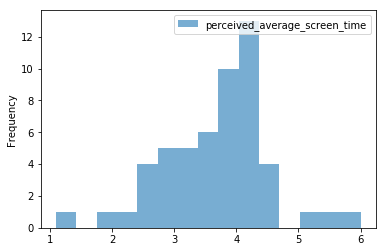

In [211]:
perceived_wo_missing = ind[ind.perceived_average_screen_time != -1]
perceived_time = pd.DataFrame(perceived_wo_missing,columns=['perceived_average_screen_time'])
perceived_hist = perceived_time.plot.hist(bins = 15, alpha = 0.6)
plt.show()

In [59]:
mean = ind_wo_missing['actual_average_screen_time'].mean()
std = ind_wo_missing['actual_average_screen_time'].std()
print(mean, std)

intense_user = ind[ind.actual_average_screen_time >= (mean + std)]
print(intense_user)

3.972857142857143 1.7595802332950317
                                    uuid  age  gender   system  \
15  1155FF54-63D3-4AB2-9863-8385D0BD0A13   23    male  Android   
32  5EF64122-B513-46AE-BCF1-E62AAC285D2C   36  female      iOS   
44  33A85C34-CFE4-4732-9E73-0A7AC861B27A   29    male  Android   
45  5119D0F8-FCA8-4184-A4EB-19421A40DE0D   25  female  Android   

    hours_in_study  perceived_average_screen_time  actual_average_screen_time  
15              44                           -1.0                       10.78  
32              65                            6.0                        6.06  
44             102                           -1.0                       11.63  
45             110                            3.2                        5.94  


In [64]:
missing_bl = []
for i in range(60):
    if ind.perceived_average_screen_time[i] == -1:
        missing_bl.append(1)
    else:     
        missing_bl.append(0)

intense_bl = []
for i in range(60):
    if ind.actual_average_screen_time[i] >= (mean + std):
        intense_bl.append(1)
    else:     
        intense_bl.append(0)

In [73]:
from scipy.stats import chi2_contingency

obs = np.zeros((2, 2))

mis_int = 0
mis_not_int = 0
not_mis_int = 0
not_mis_not_int = 0

for i in range(60):
    if missing_bl[i] == 1 and intense_bl[i] == 1:
        mis_int += 1
    elif missing_bl[i] == 1 and intense_bl[i] == 0: 
        mis_not_int += 1
    elif missing_bl[i] == 0 and intense_bl[i] == 1: 
        not_mis_int += 1
    elif missing_bl[i] == 0 and intense_bl[i] == 0: 
        not_mis_not_int += 1

obs[0,0] = mis_int
obs[0,1] = mis_not_int
obs[1,0] = not_mis_int
obs[1,1] = not_mis_not_int
        
print(chi2_contingency(obs))

(2.7753176742395067, 0.09572766187792295, 1, array([[ 0.46666667,  6.53333333],
       [ 3.53333333, 49.46666667]]))


In [138]:
print(obs)

[[ 2.  5.]
 [ 2. 51.]]


In [198]:
user_id = ind.uuid

for i in range(60):
    a = ssr[user_id[i]]['location:raw_latitude']
    b = ssr[user_id[i]]['lf_measurements:battery_level']
    index = [idx for idx, val in enumerate(b) if val < 0.20] 
    locs = a[index]
#     if all(elem == 'NaN' for elem in locs):
#         print(user_id[i])
    if len(locs[locs.isnull()]) == len(locs) and  len(locs) != 0:
        print(user_id[i],len(locs) )
        

098A72A5-E3E5-4F54-A152-BBDA0DF7B694 415
CDA3BBF7-6631-45E8-85BA-EEB416B32A3C 74
96A358A0-FFF2-4239-B93E-C7425B901B47 277
B09E373F-8A54-44C8-895B-0039390B859F 369
B7F9D634-263E-4A97-87F9-6FFB4DDCB36C 176


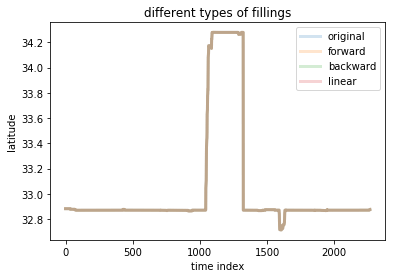

In [199]:
lat = ssr['F50235E0-DD67-4F2A-B00B-1F31ADA998B9']['location:raw_latitude']
d1 = lat.ffill(axis = 'rows')
d2 = lat.bfill(axis = 'rows')
d3 = lat.interpolate()

plt.plot(lat, label = 'original', alpha = 0.2, linewidth = 3)
plt.plot(d1, label = 'forward', alpha = 0.2, linewidth = 3)
plt.plot(d2, label = 'backward', alpha = 0.2, linewidth = 3)
plt.plot(d3, label = 'linear', alpha = 0.2, linewidth = 3)

plt.legend(loc = 'upper right')
plt.ylabel('latitude')
plt.xlabel('time index')
plt.title('different types of fillings')

plt.show()